In [6]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
#Load the training data
col_names = ['A', 'phi', 'deltaI', 'deltaR', 'E', 'k']
peak_names = ['peak1', 'peak2', 'peak3', 'peak4', 'peak5']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4', 'loc5']
width_names = ['width1', 'width2', 'width3','width4', 'width5']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4', 'prom5']
col_names = col_names + peak_names + locs_names + width_names + prom_names

data = pd.read_csv('Training_Data/Line_Cut/LineCutTrainingData050318.csv', header = None, names = col_names)

#The peak information columns have zeros when there weren't 5 peaks

data.head()

,A,phi,deltaI,deltaR,E,k,peak1,peak2,peak3,peak4,...,width1,width2,width3,width4,width5,prom1,prom2,prom3,prom4,prom5
0,0.41597,-0.071484,0.81472,-0.14798,-0.4,0.06469,1.9967,1.3131,1.1905,1.1785,...,1.4630,46.800,50.281,32.218,0.000,1.27010,0.53509,0.37420,0.15110,0.00000
1,0.19665,-0.826290,0.81472,-0.14798,-0.3,0.12292,1.8206,1.2586,1.1584,1.1373,...,1.5461,24.827,26.035,27.184,26.446,1.28980,0.45609,0.30073,0.26413,0.20762
2,0.17607,-0.457510,0.81472,-0.14798,-0.2,0.16228,1.7140,1.2330,1.1453,1.1205,...,1.4174,18.767,19.882,20.103,20.188,1.12150,0.41003,0.27792,0.22411,0.18490
3,0.11806,0.414250,0.81472,-0.14798,-0.1,0.19463,1.6298,1.2167,1.1380,1.1051,...,1.3712,15.619,16.632,16.654,17.221,0.99603,0.37978,0.26048,0.20270,0.18805
4,-0.00054,0.000000,0.81472,-0.14798,0.0,0.22312,1.5562,1.2038,1.1305,1.1027,...,1.3342,13.635,14.398,14.818,14.560,0.87763,0.35828,0.24145,0.19974,0.16361


## Creating the various test, train, data sets

In [8]:
target = data[['deltaI', 'deltaR']]

train1 = data[['A', 'phi', 'E', 'k']]
train2 = data[['A', 'phi', 'E']]

##Just the entries with E = -0.4
#train_E_04 = train1[train1['E']==-0.4]
#target_E_04 = target[train1['E']==-0.4]
#train_E_04_a = train_E_04[['A', 'phi']] 

#Making a copy of the data frame
df1 = data

columns1 = df1.columns
X1 = df1.drop(columns1[2:4], axis = 1) #everything except target
X2 = X1.drop(columns1[6:], axis = 1) # no additional peak info
X3 = X2.drop(columns1[4:6], axis = 1) # no E, k

Y1 = df1[['deltaR']]
Y2 = df1[['deltaI']]
Y3 = pd.DataFrame.join(Y1,Y2)

#Making another copy of the data frame
df2 = df1

#Initializing a new dataframe to use the average peaks, prominences and widths as features instead of each one
new_df = pd.DataFrame(np.zeros([1000,7]), columns = ['deltaI', 'deltaR', 'avgA', 'avgPhi', 'avgPeak', 'avgWidth', 'avgProm'])
for i in range(1,1001):
        
        temp_df = df2[9*(i-1):9*i]
        columns = temp_df.columns
        new_df['deltaI'][i-1] = temp_df['deltaI'].mean()
        new_df['deltaR'][i-1] = temp_df['deltaR'].mean()
        
        new_df['avgA'][i-1] = temp_df['A'].mean()
        new_df['avgPhi'][i-1] = temp_df['phi'].mean()
        
        new_df['avgPeak'][i-1] = temp_df[columns[6:11]][temp_df[columns[6:11]]>0].mean().mean()
        
        new_df['avgWidth'][i-1] = temp_df[columns[11:16]][temp_df[columns[11:16]]>0].mean().mean()
        
        new_df['avgProm'][i-1] = temp_df[columns[16:21]][temp_df[columns[16:21]]>0].mean().mean()
        
        
#new_df.head()
new_columns = new_df.columns
X_new_df = new_df.drop(new_columns[0:2], axis=1)
Y_new_df = new_df.drop(new_columns[2:], axis = 1)


#### Splitting each dataset in the previous cell into train and test

In [9]:
#Random state
rs = 42
#Test size
ts1 = 0.3

X_a_train, X_a_test, Y_a_train, Y_a_test = train_test_split(train1, target, test_size = ts1, random_state = rs)

X_b_train, X_b_test, Y_b_train, Y_b_test = train_test_split(train2, target, test_size = ts1, random_state = rs)

#Splitting X1, Y1 into train and test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs)

#Splitting X2, Y2 into train and test
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs)

#Splitting X3, Y3 into train and test
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = ts1, random_state = rs)

#Splitting X_new_df, Y_new_df into train and test
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new_df, Y_new_df, test_size = ts1, random_state = rs)



## Making models

#### Using linear regression from scikit-learn on the minimal data set (only A, phi, E, k as features)

Coefficients: 
 [[-0.21991197 -0.01540643  0.38990444 -1.44228087]
 [ 0.09677622 -0.03395959  0.11769048 -0.11807126]]
Mean squared error: 0.14
Variance score: 0.00


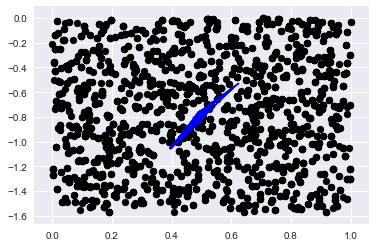

In [10]:
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg1 = reg.fit(X_a_train, Y_a_train)

#Make predictions using the testing set
y_pred1 = reg1.predict(X_a_test)

# The coefficients
print('Coefficients: \n', reg1.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_a_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_a_test, y_pred1))

# Plot outputs
plt.scatter(Y_a_test['deltaI'], Y_a_test['deltaR'],  color=['black'])
plt.plot(y_pred1[:,0], y_pred1[:,1], color='blue', linewidth=1)

#### Using linear regression from scikit-learn on the data set with only A, phi and E as features (no k). 

Coefficients: 
 [[-0.01373914 -0.01122417  0.02241654]
 [ 0.1136544  -0.03361721  0.08760635]]
Mean squared error: 0.14
Variance score: 0.00


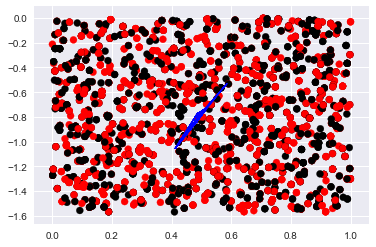

In [11]:
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg2 = reg.fit(X_b_train, Y_b_train)

#Make predictions using the testing set
y_pred2 = reg2.predict(X_b_test)

# The coefficients
print('Coefficients: \n', reg2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_b_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_b_test, y_pred2))

# Plot outputs
plt.scatter(Y_b_test['deltaI'], Y_b_test['deltaR'],  color=['black','red'])
plt.plot(y_pred2[:,0], y_pred2[:,1], color='blue', linewidth=1)


Coefficients: 
 [[20.09451164 -0.13552241 -0.32957025 -0.02266454 -0.16168422]
 [-4.94530955 -0.02975644 -3.35059273 -0.03694343  0.28560138]]
Mean squared error: 0.04
Variance score: 0.69


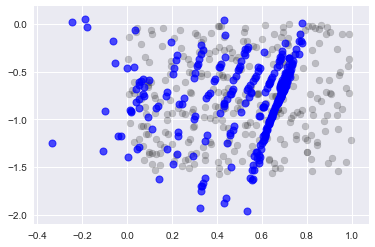

In [12]:
#Initialize and fit model to training data with new columns
reg = linear_model.LinearRegression()
reg_new_lm = reg.fit(X_new_train, Y_new_train)

#Make predictions using the testing set
y_pred_new_lm = reg_new_lm.predict(X_new_test)

# The coefficients
print('Coefficients: \n', reg_new_lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_new_test, y_pred_new_lm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_new_test, y_pred_new_lm))

# Plot outputs
plt.scatter(Y_new_test['deltaI'], Y_new_test['deltaR'],  color=['black'], alpha = 0.2)
plt.scatter(y_pred_new_lm[:,0], y_pred_new_lm[:,1], color='blue', linewidth=1, alpha = 0.7)

In [13]:
X_new_train.columns

Index(['avgA', 'avgPhi', 'avgPeak', 'avgWidth', 'avgProm'], dtype='object')

# Using statsmodels

In [14]:
#Initialize and fit OLS model for deltaR 
model = sm.OLS(Y1_train, X1_train)
results = model.fit()

#Make predictions on testing data
predictions = results.predict(X1_test) # make the predictions by the model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaR   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     3606.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:48:39   Log-Likelihood:                 200.58
No. Observations:                6300   AIC:                            -353.2
Df Residuals:                    6276   BIC:                            -191.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.2614      0.095      2.740      0.006       0.074       0.448
phi            0.0020      0.004      0.490      0.624      -0.006       0.010
E              2.7666      1.026      2.697      0.007       0.756       4.777
k            -16.3224      4.955     -3.294      0.001     -26.036      -6.609
peak1         -0.1074      0.023     -4.754      0.000      -0.152      -0.063
peak2          7.9402      3.095      2.566      0.010       1.874      14.007
peak3        -10.2510      2.688     -3.813      0.000     -15.521      -4.981
peak4         -4.3707      1.610     -2.714      0.007      -7.528      -1.214
peak5         11.7931      2.388      4.938      0.000       7.111      16.475
loc1           0.0699      0.008      8.525      0.000       0.054       0.086
loc2          -0.0986      0.009    -11.421      0.000      -0.116      -0.082
loc3          -0.0746      0.009     -8.454      0.000      -0.092      -0.057
loc4           0.0296      0.005      5.419      0.000       0.019       0.040
loc5          -0.0263      0.007     -3.562      0.000      -0.041      -0.012
width1         0.1936      0.011     17.930      0.000       0.172       0.215
width2         0.8038      0.052     15.379      0.000       0.701       0.906
width3        -0.2668      0.031     -8.608      0.000      -0.328      -0.206
width4        -0.0711      0.016     -4.464      0.000      -0.102      -0.040
width5        -0.0407      0.044     -0.921      0.357      -0.127       0.046
prom1          0.0108      0.022      0.488      0.626      -0.032       0.054
prom2        -14.8944      2.261     -6.588      0.000     -19.326     -10.463
prom3         13.8582      2.115      6.553      0.000       9.712      18.004
prom4          3.1510      1.492      2.111      0.035       0.226       6.077
prom5         -4.4427      1.158     -3.838      0.000      -6.712      -2.173
==============================================================================
Omnibus:                      287.690   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.298
Skew:                          -0.260   Prob(JB):                    1.91e-153
Kurtosis:                       4.552   Cond. No.                     3.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

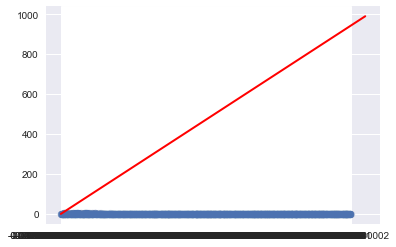

In [15]:
#plt.scatter(X1_test['A'],Y1_test, color = 'black', alpha = 0.5)
#plt.scatter(X1_test['A'],predictions)
plt.scatter(Y1_test,predictions, alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -2


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one



In [16]:
#Initialize and fit OLS model for deltaI 
model_I = sm.OLS(Y2_train, X1_train)
results_I = model_I.fit()

#Make predictions on testing data
predictions_I = results_I.predict(X1_test) # make the predictions by the model

results_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1824.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:48:48   Log-Likelihood:                 1126.3
No. Observations:                6300   AIC:                            -2205.
Df Residuals:                    6276   BIC:                            -2043.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.1402      0.082      1.702      0.089      -0.021       0.302
phi           -0.0056      0.003     -1.604      0.109      -0.012       0.001
E             -1.2315      0.885     -1.391      0.164      -2.967       0.504
k              6.5180      4.278      1.524      0.128      -1.868      14.904
peak1         -0.2646      0.019    -13.573      0.000      -0.303      -0.226
peak2        -19.9017      2.672     -7.449      0.000     -25.139     -14.664
peak3         29.5884      2.321     12.749      0.000      25.039      34.138
peak4         -6.2769      1.390     -4.515      0.000      -9.003      -3.551
peak5         -3.7786      2.062     -1.832      0.067      -7.821       0.264
loc1          -0.1501      0.007    -21.195      0.000      -0.164      -0.136
loc2           0.0649      0.007      8.700      0.000       0.050       0.079
loc3           0.0381      0.008      5.001      0.000       0.023       0.053
loc4           0.0179      0.005      3.785      0.000       0.009       0.027
loc5           0.0170      0.006      2.667      0.008       0.005       0.030
width1        -0.1541      0.009    -16.535      0.000      -0.172      -0.136
width2        -0.4330      0.045     -9.596      0.000      -0.521      -0.345
width3         0.1242      0.027      4.642      0.000       0.072       0.177
width4        -0.1053      0.014     -7.654      0.000      -0.132      -0.078
width5        -0.0104      0.038     -0.272      0.786      -0.085       0.064
prom1          0.1978      0.019     10.391      0.000       0.160       0.235
prom2          8.1186      1.952      4.160      0.000       4.292      11.945
prom3        -11.9180      1.826     -6.527      0.000     -15.497      -8.339
prom4          3.0680      1.288      2.381      0.017       0.542       5.594
prom5          0.3543      0.999      0.355      0.723      -1.605       2.314
==============================================================================
Omnibus:                       74.317   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.769
Skew:                          -0.270   Prob(JB):                     2.14e-17
Kurtosis:                       3.009   Cond. No.                     3.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

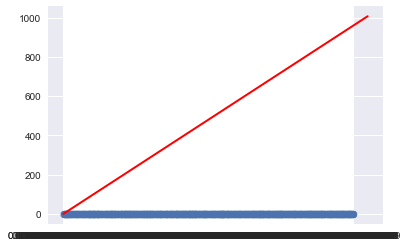

In [17]:
#plt.scatter(X1_test['A'],Y2_test, color = 'black', alpha = 0.5)
#plt.scatter(X1_test['A'],predictions_I)

plt.scatter(Y2_test,predictions_I, alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -0.5


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

In [18]:
#Initialize and fit model for just deltaR using A, phi, E, k only
model2 = sm.OLS(Y1_train,X2_train)
results2 = model2.fit()

predictions2 = results2.predict(X2_test)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaR   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     4889.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:48:58   Log-Likelihood:                -3836.0
No. Observations:                6300   AIC:                             7680.
Df Residuals:                    6296   BIC:                             7707.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -0.3890      0.069     -5.624      0.000      -0.525      -0.253
phi           -0.0438      0.006     -7.207      0.000      -0.056      -0.032
E              0.9564      0.044     21.803      0.000       0.870       1.042
k             -3.4266      0.050    -69.187      0.000      -3.524      -3.329
==============================================================================
Omnibus:                     2965.265   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.727
Skew:                          -0.005   Prob(JB):                     1.53e-72
Kurtosis:                       1.878   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

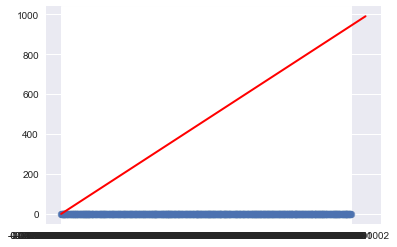

In [19]:
#plt.scatter(X2_test['A'],Y1_test, color = 'black', alpha = 0.5)
#plt.scatter(X2_test['A'],predictions2)

plt.scatter(Y1_test,predictions2, alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -1


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

In [20]:
#Initialize and fit model for just deltaI using A, phi, E, k only
model2_I = sm.OLS(Y2_train,X2_train)
results2_I = model2_I.fit()

predictions2_I = results2_I.predict(X2_test)
results2_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4722.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:49:07   Log-Likelihood:                -1047.1
No. Observations:                6300   AIC:                             2102.
Df Residuals:                    6296   BIC:                             2129.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.3074      0.044      6.917      0.000       0.220       0.394
phi           -0.0047      0.004     -1.202      0.229      -0.012       0.003
E             -0.5204      0.028    -18.470      0.000      -0.576      -0.465
k              2.1486      0.032     67.542      0.000       2.086       2.211
==============================================================================
Omnibus:                     5917.017   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.079
Skew:                          -0.004   Prob(JB):                     3.97e-84
Kurtosis:                       1.790   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

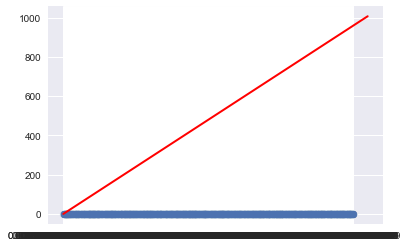

In [21]:
#plt.scatter(X2_test['A'],Y2_test, color = 'black', alpha = 0.5)
#plt.scatter(X2_test['A'],predictions2_I)

plt.scatter(Y2_test,predictions2_I, alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -0.5


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

In [22]:
#Initialize and fit model for just deltaR using A, phi only
model3 = sm.OLS(Y1_train,X3_train)
results3 = model3.fit()

predictions3 = results3.predict(X3_test)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaR   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     2777.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:49:15   Log-Likelihood:                -6293.7
No. Observations:                6300   AIC:                         1.259e+04
Df Residuals:                    6298   BIC:                         1.260e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -3.4439      0.047    -72.544      0.000      -3.537      -3.351
phi           -0.2382      0.008    -28.954      0.000      -0.254      -0.222
==============================================================================
Omnibus:                      170.965   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.829
Skew:                           0.420   Prob(JB):                     7.33e-41
Kurtosis:                       2.990   Cond. No.                         5.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

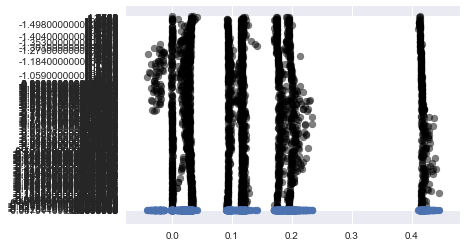

In [23]:
plt.scatter(X3_test['A'],Y1_test, color = 'black', alpha = 0.5)
plt.scatter(X3_test['A'],predictions3)

In [24]:
#Initialize and fit model for just deltaI using A, phi only
model3_I = sm.OLS(Y2_train,X3_train)
results3_I = model3_I.fit()

predictions3_I = results3_I.predict(X3_test)
results3_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     2572.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:49:23   Log-Likelihood:                -3533.1
No. Observations:                6300   AIC:                             7070.
Df Residuals:                    6298   BIC:                             7084.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              2.1681      0.031     70.785      0.000       2.108       2.228
phi            0.1232      0.005     23.219      0.000       0.113       0.134
==============================================================================
Omnibus:                      185.739   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.114
Skew:                          -0.438   Prob(JB):                     1.29e-44
Kurtosis:                       2.953   Cond. No.                         5.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

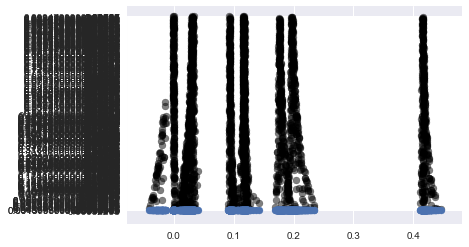

In [25]:
plt.scatter(X3_test['A'],Y2_test, color = 'black', alpha = 0.5)
plt.scatter(X3_test['A'],predictions3_I)

In [26]:
#Initialize and fit model for just deltaI using newer dataframe with average peak info
model_new1_I = sm.OLS(Y_new_train['deltaI'],X_new_train)
results_new1_I = model_new1_I.fit()

predictions_new1_I = results_new1_I.predict(X_new_test)
results_new1_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1566.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:49:33   Log-Likelihood:                 263.29
No. Observations:                 700   AIC:                            -516.6
Df Residuals:                     695   BIC:                            -493.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgA          22.3346      3.484      6.410      0.000      15.494      29.175
avgPhi        -0.1142      0.030     -3.858      0.000      -0.172      -0.056
avgPeak       -0.1401      0.055     -2.542      0.011      -0.248      -0.032
avgWidth      -0.0484      0.007     -7.418      0.000      -0.061      -0.036
avgProm        0.0754      0.061      1.238      0.216      -0.044       0.195
==============================================================================
Omnibus:                       12.148   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.332
Skew:                          -0.301   Prob(JB):                      0.00210
Kurtosis:                       3.246   Cond. No.                     3.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

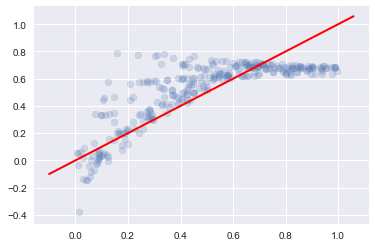

In [27]:
#plt.scatter(X_new_test['avgA'],Y_new_test['deltaI'], color = 'black', alpha = 0.5)
#plt.scatter(X_new_test['avgA'],predictions_new1_I)

plt.scatter(Y_new_test['deltaI'],predictions_new1_I, alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -0.1


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

In [28]:
#Initialize and fit model for just deltaR using newer dataframe with average peak info
model_new1 = sm.OLS(Y_new_train['deltaR'],X_new_train)
results_new1 = model_new1.fit()

predictions_new1 = results_new1.predict(X_new_test)
results_new1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.935   
Dependent Variable: deltaR           AIC:                -69.0469
Date:               2018-05-17 20:49 BIC:                -46.2915
No. Observations:   700              Log-Likelihood:     39.523  
Df Model:           5                F-statistic:        2021.   
Df Residuals:       695              Prob (F-statistic): 0.00    
R-squared:          0.936            Scale:              0.052674
------------------------------------------------------------------
             Coef.   Std.Err.     t      P>|t|    [0.025    0.975]
------------------------------------------------------------------
avgA        -2.5150    4.7964   -0.5243  0.6002  -11.9322   6.9022
avgPhi      -0.0066    0.0407   -0.1615  0.8717   -0.0866   0.0734
avgPeak     -3.1451    0.0759  -41.4431  0.0000   -3.2941  -2.9961
avgWidth    -0.0649    0.0090   -7.2218  0.0000   -0.0825  -0.0472
avgProm      0.5429    0.0839    6.4732  0.0000    0.3782   0.7075
-----------------------------------------------------------------
Omnibus:             95.871       Durbin-Watson:          2.052  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       150.688
Skew:                0.901        Prob(JB):               0.000  
Kurtosis:            4.385        Condition No.:          39122  
=================================================================
* The condition number is large (4e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

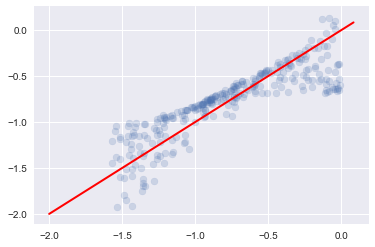

In [29]:
#plt.scatter(X_new_test['avgA'],Y_new_test['deltaR'], color = 'black', alpha = 0.5)
#plt.scatter(X_new_test['avgA'],predictions_new1)

plt.scatter(Y_new_test['deltaR'],predictions_new1, alpha = 0.2)
xmin, xmax = plt.xlim()
xmin = -2


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

#### Using statsmodels GLM (generalized linear model)

In [30]:
model4 = sm.GLM(Y1_train,X1_train)
results4 = model4.fit()
predictions4 = results4.predict(X1_test)

results4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            -353.1503  
Link Function:      identity         BIC:            -54558.2528
Dependent Variable: deltaR           Log-Likelihood: 200.58     
Date:               2018-05-17 20:49 LL-Null:        -3847.7    
No. Observations:   6300             Deviance:       346.11     
Df Model:           23               Pearson chi2:   346.       
Df Residuals:       6276             Scale:          0.055148   
Method:             IRLS                                        
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
A          0.2614    0.0954    2.7405  0.0061    0.0745    0.4484
phi        0.0020    0.0040    0.4899  0.6242   -0.0059    0.0099
E          2.7666    1.0257    2.6974  0.0070    0.7564    4.7769
k        -16.3224    4.9552   -3.2940  0.0010  -26.0343   -6.6104
peak1     -0.1074    0.0226   -4.7537  0.0000   -0.1516   -0.0631
peak2      7.9402    3.0946    2.5658  0.0103    1.8749   14.0054
peak3    -10.2510    2.6883   -3.8133  0.0001  -15.5199   -4.9821
peak4     -4.3707    1.6105   -2.7140  0.0066   -7.5271   -1.2143
peak5     11.7931    2.3885    4.9375  0.0000    7.1118   16.4745
loc1       0.0699    0.0082    8.5253  0.0000    0.0539    0.0860
loc2      -0.0986    0.0086  -11.4208  0.0000   -0.1156   -0.0817
loc3      -0.0746    0.0088   -8.4543  0.0000   -0.0919   -0.0573
loc4       0.0296    0.0055    5.4191  0.0000    0.0189    0.0403
loc5      -0.0263    0.0074   -3.5624  0.0004   -0.0408   -0.0118
width1     0.1936    0.0108   17.9300  0.0000    0.1724    0.2148
width2     0.8038    0.0523   15.3787  0.0000    0.7013    0.9062
width3    -0.2668    0.0310   -8.6082  0.0000   -0.3276   -0.2061
width4    -0.0711    0.0159   -4.4640  0.0000   -0.1024   -0.0399
width5    -0.0407    0.0442   -0.9210  0.3571   -0.1273    0.0459
prom1      0.0108    0.0220    0.4877  0.6258   -0.0325    0.0540
prom2    -14.8944    2.2607   -6.5883  0.0000  -19.3254  -10.4635
prom3     13.8582    2.1148    6.5529  0.0000    9.7132   18.0032
prom4      3.1510    1.4923    2.1115  0.0347    0.2261    6.0759
prom5     -4.4427    1.1576   -3.8377  0.0001   -6.7116   -2.1737
================================================================

"""

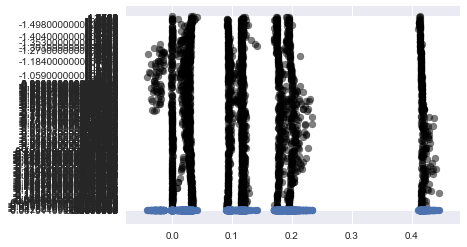

In [31]:
plt.scatter(X1_test['A'],Y1_test, color = 'black', alpha = 0.5)
plt.scatter(X1_test['A'],predictions4)

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            -2204.6012 
Link Function:      identity         BIC:            -54646.3842
Dependent Variable: deltaI           Log-Likelihood: 1126.3     
Date:               2018-05-17 20:49 LL-Null:        -1035.7    
No. Observations:   6300             Deviance:       257.98     
Df Model:           23               Pearson chi2:   258.       
Df Residuals:       6276             Scale:          0.041105   
Method:             IRLS                                        
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
A          0.1402    0.0824    1.7024  0.0887   -0.0212    0.3016
phi       -0.0056    0.0035   -1.6044  0.1086   -0.0124    0.0012
E         -1.2315    0.8855   -1.3907  0.1643   -2.9670    0.5041
k          6.5180    4.2780    1.5236  0.1276   -1.8668   14.9028
peak1     -0.2646    0.0195  -13.5730  0.0000   -0.3028   -0.2264
peak2    -19.9017    2.6717   -7.4491  0.0000  -25.1381  -14.6653
peak3     29.5884    2.3209   12.7487  0.0000   25.0395   34.1373
peak4     -6.2769    1.3904   -4.5145  0.0000   -9.0020   -3.5518
peak5     -3.7786    2.0621   -1.8324  0.0669   -7.8202    0.2630
loc1      -0.1501    0.0071  -21.1952  0.0000   -0.1640   -0.1362
loc2       0.0649    0.0075    8.7000  0.0000    0.0503    0.0795
loc3       0.0381    0.0076    5.0005  0.0000    0.0232    0.0530
loc4       0.0179    0.0047    3.7849  0.0002    0.0086    0.0271
loc5       0.0170    0.0064    2.6671  0.0077    0.0045    0.0295
width1    -0.1541    0.0093  -16.5347  0.0000   -0.1724   -0.1359
width2    -0.4330    0.0451   -9.5964  0.0000   -0.5215   -0.3446
width3     0.1242    0.0268    4.6420  0.0000    0.0718    0.1767
width4    -0.1053    0.0138   -7.6535  0.0000   -0.1322   -0.0783
width5    -0.0104    0.0382   -0.2719  0.7857   -0.0852    0.0644
prom1      0.1978    0.0190   10.3910  0.0000    0.1605    0.2351
prom2      8.1186    1.9518    4.1595  0.0000    4.2931   11.9440
prom3    -11.9180    1.8258   -6.5275  0.0000  -15.4965   -8.3394
prom4      3.0680    1.2884    2.3813  0.0173    0.5428    5.5933
prom5      0.3543    0.9994    0.3545  0.7229   -1.6045    2.3132
================================================================

"""

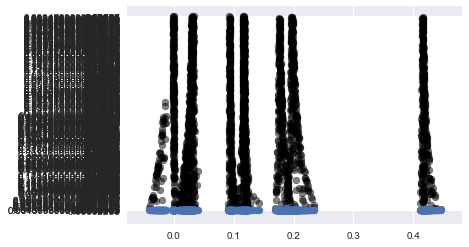

In [32]:
model4_I = sm.GLM(Y2_train,X1_train)
results4_I = model4_I.fit()
predictions4_I = results4_I.predict(X1_test)


plt.scatter(X1_test['A'],Y2_test, color = 'black', alpha = 0.5)
plt.scatter(X1_test['A'],predictions4_I)

results4_I.summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:                 deltaR   No. Observations:                  6300
Model:                            GLM   Df Residuals:                      6296
Model Family:                Gaussian   Df Model:                             3
Link Function:               identity   Scale:              0.19800185197964532
Method:                          IRLS   Log-Likelihood:                 -3836.0
Date:                Thu, 17 May 2018   Deviance:                        1246.6
Time:                        20:49:53   Pearson chi2:                  1.25e+03
No. Iterations:                     2                                          
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
A             -0.3890      0.069     -5.624      0.000      -0.525      -0.253
phi           -0.0438      0.006     -7.207      0.000      -0.056      -0.032
E              0.9564      0.044     21.803      0.000       0.870       1.042
k             -3.4266      0.050    -69.187      0.000      -3.524      -3.329
==============================================================================
"""

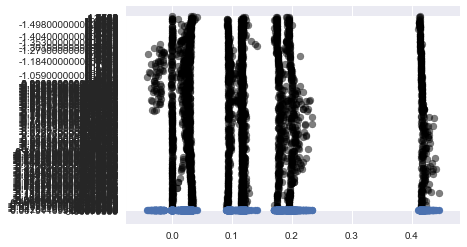

In [33]:
model5 = sm.GLM(Y1_train,X2_train)
results5 = model5.fit()
predictions5 = results5.predict(X2_test)


plt.scatter(X2_test['A'],Y1_test, color = 'black', alpha = 0.5)
plt.scatter(X2_test['A'],predictions5)

results5.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            2102.1820  
Link Function:      identity         BIC:            -54565.0118
Dependent Variable: deltaI           Log-Likelihood: -1047.1    
Date:               2018-05-17 20:50 LL-Null:        -1035.7    
No. Observations:   6300             Deviance:       514.32     
Df Model:           3                Pearson chi2:   514.       
Df Residuals:       6296             Scale:          0.081689   
Method:             IRLS                                        
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
A        0.3074     0.0444     6.9173   0.0000    0.2203    0.3945
phi     -0.0047     0.0039    -1.2023   0.2292   -0.0124    0.0030
E       -0.5204     0.0282   -18.4703   0.0000   -0.5756   -0.4652
k        2.1486     0.0318    67.5424   0.0000    2.0863    2.2110
================================================================

"""

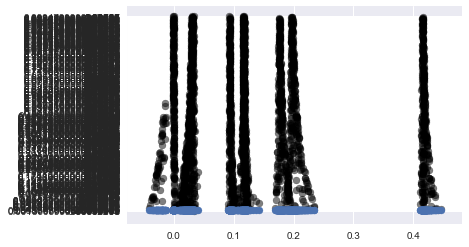

In [34]:
model5_I = sm.GLM(Y2_train,X2_train)
results5_I = model5_I.fit()
predictions5_I = results5_I.predict(X2_test)


plt.scatter(X2_test['A'],Y2_test, color = 'black', alpha = 0.5)
plt.scatter(X2_test['A'],predictions5_I)

results5_I.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            12591.3230 
Link Function:      identity         BIC:            -52376.7469
Dependent Variable: deltaR           Log-Likelihood: -6293.7    
Date:               2018-05-17 20:50 LL-Null:        -3847.7    
No. Observations:   6300             Deviance:       2720.1     
Df Model:           1                Pearson chi2:   2.72e+03   
Df Residuals:       6298             Scale:          0.43190    
Method:             IRLS                                        
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
A       -3.4439     0.0475   -72.5437   0.0000   -3.5369   -3.3508
phi     -0.2382     0.0082   -28.9537   0.0000   -0.2543   -0.2221
================================================================

"""

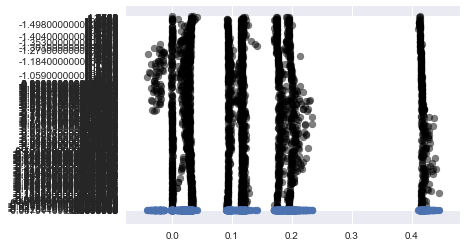

In [35]:
model6 = sm.GLM(Y1_train,X3_train)
results6 = model6.fit()
predictions6 = results6.predict(X3_test)


plt.scatter(X3_test['A'],Y1_test, color = 'black', alpha = 0.5)
plt.scatter(X3_test['A'],predictions6)

results6.summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:                 deltaI   No. Observations:                  6300
Model:                            GLM   Df Residuals:                      6298
Model Family:                Gaussian   Df Model:                             1
Link Function:               identity   Scale:              0.17979187168979038
Method:                          IRLS   Log-Likelihood:                 -3533.1
Date:                Thu, 17 May 2018   Deviance:                        1132.3
Time:                        20:50:20   Pearson chi2:                  1.13e+03
No. Iterations:                     2                                          
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
A              2.1681      0.031     70.785      0.000       2.108       2.228
phi            0.1232      0.005     23.219      0.000       0.113       0.134
==============================================================================
"""

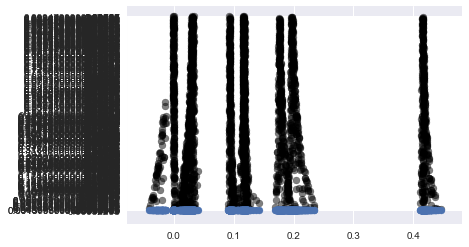

In [36]:
model6_I = sm.GLM(Y2_train,X3_train)
results6_I = model6_I.fit()
predictions6_I = results6_I.predict(X3_test)


plt.scatter(X3_test['A'],Y2_test, color = 'black', alpha = 0.5)
plt.scatter(X3_test['A'],predictions6_I)

results6_I.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:                 deltaR   No. Observations:                    700
Model:                            GLM   Df Residuals:                        695
Model Family:                Gaussian   Df Model:                              4
Link Function:               identity   Scale:              0.052674034378001985
Method:                          IRLS   Log-Likelihood:                   39.523
Date:                Thu, 17 May 2018   Deviance:                         36.608
Time:                        20:50:29   Pearson chi2:                       36.6
No. Iterations:                     2                                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
avgA          -2.5150      4.796     -0.524      0.600     -11.916       6.886
avgPhi        -0.0066      0.041     -0.162      0.872      -0.086       0.073
avgPeak       -3.1451      0.076    -41.443      0.000      -3.294      -2.996
avgWidth      -0.0649      0.009     -7.222      0.000      -0.082      -0.047
avgProm        0.5429      0.084      6.473      0.000       0.378       0.707
==============================================================================
"""

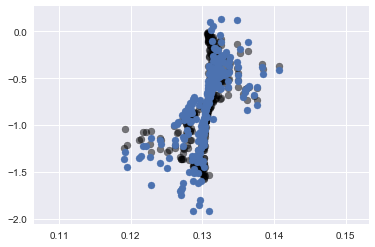

In [37]:
model_new2 = sm.GLM(Y_new_train['deltaR'],X_new_train)
results_new2 = model_new2.fit()
predictions_new2 = results_new2.predict(X_new_test)


plt.scatter(X_new_test['avgA'],Y_new_test['deltaR'], color = 'black', alpha = 0.5)
plt.scatter(X_new_test['avgA'],predictions_new2)

results_new2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:                 deltaI   No. Observations:                    700
Model:                            GLM   Df Residuals:                        695
Model Family:                Gaussian   Df Model:                              4
Link Function:               identity   Scale:              0.027793402353724034
Method:                          IRLS   Log-Likelihood:                   263.29
Date:                Thu, 17 May 2018   Deviance:                         19.316
Time:                        20:50:29   Pearson chi2:                       19.3
No. Iterations:                     2                                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
avgA          22.3346      3.484      6.410      0.000      15.506      29.163
avgPhi        -0.1142      0.030     -3.858      0.000      -0.172      -0.056
avgPeak       -0.1401      0.055     -2.542      0.011      -0.248      -0.032
avgWidth      -0.0484      0.007     -7.418      0.000      -0.061      -0.036
avgProm        0.0754      0.061      1.238      0.216      -0.044       0.195
==============================================================================
"""

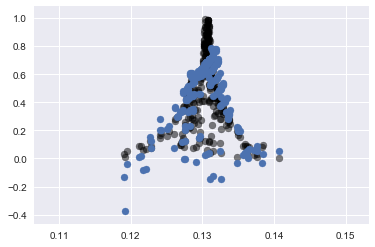

In [38]:
model_new2_I = sm.GLM(Y_new_train['deltaI'],X_new_train)
results_new2_I = model_new2_I.fit()
predictions_new2_I = results_new2_I.predict(X_new_test)


plt.scatter(X_new_test['avgA'],Y_new_test['deltaI'], color = 'black', alpha = 0.5)
plt.scatter(X_new_test['avgA'],predictions_new2_I)

results_new2_I.summary()

### Using Decision Trees in scikit-learn to predict deltaI and deltaR simultaneously

Regression 1 Feature Importance: [1.80273119e-02 3.58222359e-02 0.00000000e+00 0.00000000e+00
 2.16741562e-01 2.12155133e-03 2.96677207e-01 6.10332201e-03
 3.18807755e-02 3.30477540e-03 4.01862880e-02 2.71637709e-03
 6.35515942e-03 8.90638522e-05 4.51819662e-02 2.50126630e-02
 2.05136029e-02 8.26216182e-02 3.04872339e-02 9.10454993e-03
 6.13410513e-04 2.32528218e-03 9.08329665e-03 1.15030747e-01]
Regression 2 Feature Importance: [1.98725622e-02 3.62914015e-02 0.00000000e+00 1.22632154e-05
 2.15239095e-01 2.85899800e-03 2.91844985e-01 3.58728597e-03
 3.19019237e-02 1.93209303e-02 4.06263274e-02 6.13247618e-03
 1.23627198e-04 3.01064310e-03 3.14247943e-02 2.54331086e-02
 2.06959591e-02 8.22571075e-02 3.07305221e-02 9.82509778e-03
 7.87664064e-04 4.40718567e-03 9.60384022e-03 1.14012201e-01]
Regression 3 Feature Importance: [0.01980676 0.03709744 0.         0.         0.21467601 0.00325166
 0.2933019  0.00369142 0.0315535  0.00356911 0.06064134 0.00103915
 0.00320692 0.00031774 0.03067833

array([0.98688529, 0.98724689, 0.9850273 , 0.98297394, 0.98720736,
       0.98028587, 0.98457403, 0.97181232, 0.98251969, 0.97971932])

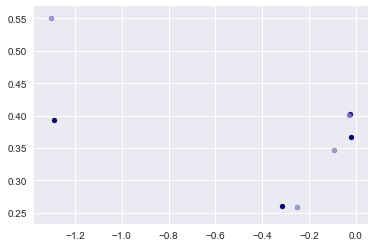

In [39]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

#Initialize the models
regr_1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3 = DecisionTreeRegressor(max_depth=40, min_samples_leaf=5)

#Fit the models
regr_1.fit(X1_train, Y3_train)
regr_2.fit(X1_train, Y3_train)
regr_3.fit(X1_train, Y3_train)


#Print the coefficients or importances
print('Regression 1 Feature Importance:', regr_1.feature_importances_)
print('Regression 2 Feature Importance:', regr_2.feature_importances_)
print('Regression 3 Feature Importance:', regr_3.feature_importances_)

#Use model to predict
y_1 = regr_1.predict(X1_test)
y_2 = regr_2.predict(X1_test)
y_3 = regr_3.predict(X1_test)

#Plot results
s = 25
plt.scatter(Y3_test.iloc[1:5, 0], Y3_test.iloc[1:5, 1], c="navy", s=s,edgecolor="black", label="data")

#plt.show()
plt.scatter(y_1[1:5, 0], y_1[1:5, 1], c="cornflowerblue", s=s,edgecolor="red", label="data", alpha = 0.8)
#plt.scatter(y_2[1:5, 0], y_2[1:5, 1], c="red", s=10,edgecolor="red", label="data")
#plt.scatter(y_3[1:5, 0], y_3[1:5, 1], c="orange", s=10,edgecolor="black", label="data")

#Trying to understand the scoring
print('Regression 1 Score: ', regr_1.score(X1_test,Y3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_2.score(X1_test,Y3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_3.score(X1_test,Y3_test),', using max depth of 30')

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
cross_val_score(regressor, X1, Y3, cv=10)


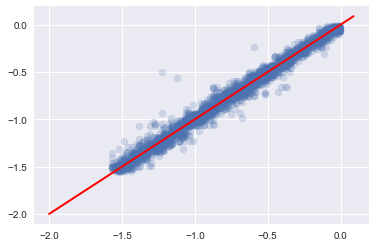

In [40]:
plt.scatter(Y3_test.iloc[:, 0], y_3[:, 0], alpha = 0.2)## deltaR
xmin, xmax = plt.xlim()
xmin = -2


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

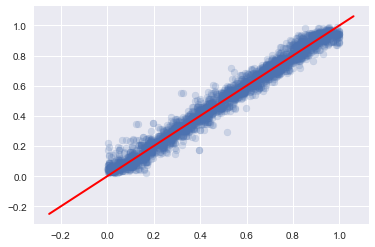

In [41]:
plt.scatter(Y3_test.iloc[:, 1], y_3[:, 1], alpha = 0.2) ## deltaI
xmin, xmax = plt.xlim()
xmin = -0.25


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

In [42]:
Y3_test.columns

Index(['deltaR', 'deltaI'], dtype='object')

Regression 1a Feature Importance: [0.03553115 0.01548038 0.64575456 0.13919793 0.16403598]
Regression 2a Feature Importance: [0.03310342 0.01482325 0.64524021 0.13818833 0.16864478]
Regression 3a Feature Importance: [0.03858085 0.01421918 0.64519348 0.13740651 0.16459998]
Regression 1 Score:  0.9752824112802764 , using max depth of 10
Regression 2 Score:  0.9780237176367443 , using max depth of 20
Regression 3 Score:  0.9761824210646434 , using max depth of 30
Cross Validation Scores:  [0.98630059 0.98738916 0.98840882 0.98771349 0.89758509 0.98444699
 0.98764805 0.96340872 0.97711689 0.98592361]


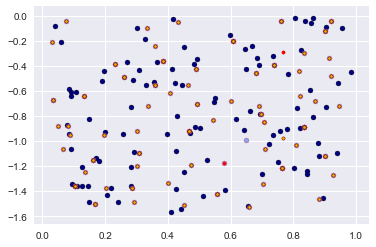

In [43]:
#Decision tree with different X features - average peak info
#Initialize the models
regr_1a = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2a = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3a = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1a.fit(X_new_train, Y_new_train)
regr_2a.fit(X_new_train, Y_new_train)
regr_3a.fit(X_new_train, Y_new_train)


#Print the coefficients or importances
print('Regression 1a Feature Importance:', regr_1a.feature_importances_)
print('Regression 2a Feature Importance:', regr_2a.feature_importances_)
print('Regression 3a Feature Importance:', regr_3a.feature_importances_)

#Use model to predict
y_1a = regr_1a.predict(X_new_test)
y_2a = regr_2a.predict(X_new_test)
y_3a = regr_3a.predict(X_new_test)

#Plot results
s = 25
plt.scatter(Y_new_test.iloc[1:100, 0], Y_new_test.iloc[1:100, 1], c="navy", s=s,edgecolor="black", label="data")

#plt.show()
plt.scatter(y_1a[1:100, 0], y_1a[1:100, 1], c="cornflowerblue", s=s,edgecolor="red", label="data", alpha = 0.8)
plt.scatter(y_2a[1:100, 0], y_2a[1:100, 1], c="red", s=10,edgecolor="red", label="data")
plt.scatter(y_3a[1:100, 0], y_3a[1:100, 1], c="orange", s=10,edgecolor="black", label="data")

#Trying to understand the scoring
print('Regression 1 Score: ', regr_1a.score(X_new_test,Y_new_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_2a.score(X_new_test,Y_new_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_3a.score(X_new_test,Y_new_test),', using max depth of 30')

regressora = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print('Cross Validation Scores: ', cross_val_score(regressora, X_new_df, Y_new_df, cv=10))

Regression 1b Feature Importance: [5.20225437e-01 4.58196162e-01 2.12264731e-02 3.51926980e-04]
Regression 2b Feature Importance: [0.52075337 0.45646681 0.01550429 0.00727552]
Regression 3b Feature Importance: [0.51487832 0.46303194 0.01506362 0.00702613]
Regression 1 Score:  0.3338952912871864 , using max depth of 10
Regression 2 Score:  0.7100695350545815 , using max depth of 20
Regression 3 Score:  0.71421429817882 , using max depth of 30
Cross Validation Scores:  [0.7132301  0.73760227 0.74054673 0.72192575 0.79648262 0.76089787
 0.76562454 0.74426662 0.68335088 0.72737562]


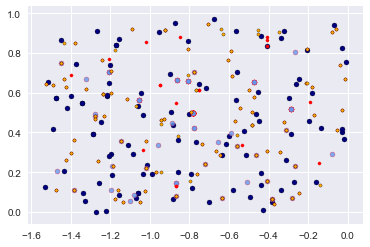

In [44]:
#Decision tree with different X features - no peak info (X2)
#Initialize the models
regr_1b = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2b = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3b = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1b.fit(X2_train, Y3_train)
regr_2b.fit(X2_train, Y3_train)
regr_3b.fit(X2_train, Y3_train)


#Print the coefficients or importances
print('Regression 1b Feature Importance:', regr_1b.feature_importances_)
print('Regression 2b Feature Importance:', regr_2b.feature_importances_)
print('Regression 3b Feature Importance:', regr_3b.feature_importances_)

#Use model to predict
y_1b = regr_1b.predict(X2_test)
y_2b = regr_2b.predict(X2_test)
y_3b = regr_3b.predict(X2_test)

#Plot results
s = 25
plt.scatter(Y3_test.iloc[1:100, 0], Y3_test.iloc[1:100, 1], c="navy", s=s,edgecolor="black", label="data")

#plt.show()
plt.scatter(y_1b[1:100, 0], y_1b[1:100, 1], c="cornflowerblue", s=s,edgecolor="red", label="data", alpha = 0.8)
plt.scatter(y_2b[1:100, 0], y_2b[1:100, 1], c="red", s=10,edgecolor="red", label="data")
plt.scatter(y_3b[1:100, 0], y_3b[1:100, 1], c="orange", s=10,edgecolor="black", label="data")

#Trying to understand the scoring
print('Regression 1 Score: ', regr_1b.score(X2_test,Y3_test), ', using max depth of 10')
print('Regression 2 Score: ', regr_2b.score(X2_test,Y3_test), ', using max depth of 20')
print('Regression 3 Score: ', regr_3b.score(X2_test,Y3_test),', using max depth of 30')

regressorb = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print('Cross Validation Scores: ', cross_val_score(regressorb, X2, Y3, cv=10))

Regression 1c Feature Importance: [0.56615029 0.43384971]
Regression 2c Feature Importance: [0.53203201 0.46796799]
Regression 3c Feature Importance: [0.52569325 0.47430675]
Regression 1c Score:  0.32554198402218193 , using max depth of 10
Regression 2c Score:  0.6633006851337655 , using max depth of 20
Regression 3c Score:  0.6675053554939313 , using max depth of 30
Cross Validation Scores 3c:  [0.66569756 0.69002474 0.69840702 0.6949197  0.75982494 0.70868007
 0.73571992 0.72377234 0.65230926 0.67278855]


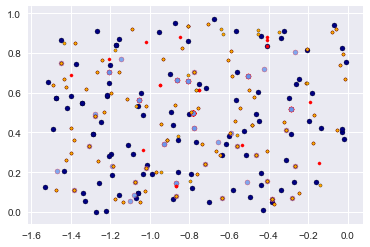

In [45]:
#Decision tree with different X features - just A, phi (X3)
#Initialize the models
regr_1c = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2c = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3c = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1c.fit(X3_train, Y3_train)
regr_2c.fit(X3_train, Y3_train)
regr_3c.fit(X3_train, Y3_train)


#Print the coefficients or importances
print('Regression 1c Feature Importance:', regr_1c.feature_importances_)
print('Regression 2c Feature Importance:', regr_2c.feature_importances_)
print('Regression 3c Feature Importance:', regr_3c.feature_importances_)

#Use model to predict
y_1c = regr_1c.predict(X3_test)
y_2c = regr_2c.predict(X3_test)
y_3c = regr_3c.predict(X3_test)

#Plot results
s = 25
plt.scatter(Y3_test.iloc[1:100, 0], Y3_test.iloc[1:100, 1], c="navy", s=s,edgecolor="black", label="data")

#plt.show()
plt.scatter(y_1c[1:100, 0], y_1c[1:100, 1], c="cornflowerblue", s=s,edgecolor="red", label="data", alpha = 0.8)
plt.scatter(y_2c[1:100, 0], y_2c[1:100, 1], c="red", s=10,edgecolor="red", label="data")
plt.scatter(y_3c[1:100, 0], y_3c[1:100, 1], c="orange", s=10,edgecolor="black", label="data")

#Trying to understand the scoring
print('Regression 1c Score: ', regr_1c.score(X3_test,Y3_test), ', using max depth of 10')
print('Regression 2c Score: ', regr_2c.score(X3_test,Y3_test), ', using max depth of 20')
print('Regression 3c Score: ', regr_3c.score(X3_test,Y3_test),', using max depth of 30')

regressorc = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print('Cross Validation Scores 3c: ', cross_val_score(regressorc, X3, Y3, cv=10))

In [46]:
#Visualize a Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regr_1c, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X3_test.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(path = 'treeTest1.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# Random Forest

One way to improve the effectiveness of decision trees and reduce the risk of overfitting, is to implement a random forest, where there are several decision trees and certain nodes within are randomly removed to avoid having one node affect the results too much. Could also use bagging to avoid overfitting. 


From the scikit-learn page for RandomForestRegressor:
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [49]:
from sklearn.ensemble import RandomForestRegressor
rs = 42
regr_rf = RandomForestRegressor(max_depth = 6,  random_state=rs)
regr_rf.fit(X1_train, Y3_train)

print('Score: ', regr_rf.score(X1_test, Y3_test))

Score:  0.90572624121


In [50]:
pd.Series(regr_rf.feature_importances_, index= X1_train.columns)

A         0.008741
phi       0.023802
E         0.000000
k         0.000000
peak1     0.192168
peak2     0.005776
peak3     0.327019
peak4     0.000645
peak5     0.015987
loc1      0.008917
loc2      0.035208
loc3      0.008849
loc4      0.000514
loc5      0.001849
width1    0.067132
width2    0.019562
width3    0.031474
width4    0.068347
width5    0.026677
prom1     0.020533
prom2     0.000103
prom3     0.005033
prom4     0.007911
prom5     0.123755
dtype: float64

Score:  0.991844111652


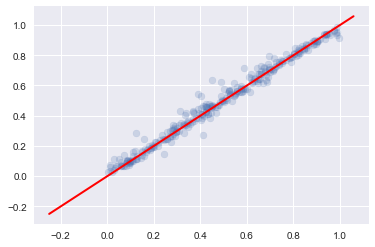

In [67]:
#Trying with a different dataset - average peak info

regr_rf1 = RandomForestRegressor(max_depth = 10, random_state = rs)
regr_rf1 = regr_rf1.fit(X_new_train, Y_new_train)

print('Score: ', regr_rf1.score(X_new_test, Y_new_test)) #R^2 score 

predict1 = pd.DataFrame(regr_rf1.predict(X_new_test), columns = ['deltaI', 'deltaR'])

plt.scatter(Y_new_test['deltaI'], predict1['deltaI'], alpha=0.2)
xmin, xmax = plt.xlim()
xmin = -0.25


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

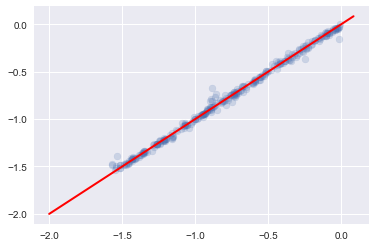

In [68]:
plt.scatter(Y_new_test['deltaR'], predict1['deltaR'], alpha=0.2)
xmin, xmax = plt.xlim()
xmin = -2


plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one


In [129]:
pd.Series(regr_rf1.feature_importances_, index= X_new_train.columns)


avgA        0.135979
avgPhi      0.026356
avgPeak     0.549375
avgWidth    0.126836
avgProm     0.161454
dtype: float64

In [130]:
#Save images of each decision tree in the forest
import six
#from sklearn import tree

dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in regr_rf1.estimators_:
    if (i_tree <= len(regr_rf1.estimators_)):        
        export_graphviz(tree_in_forest, out_file=dotfile, feature_names=X_new_train.columns)
        (pydotplus.graph_from_dot_data(dotfile.getvalue())).write_png('dtree_depth6_'+ str(i_tree) +'.png')
        dotfile = six.StringIO()
        i_tree = i_tree + 1

In [127]:
#Big Change

In [1]:
#Ken's test change 

In [ ]:
#Laura made a change too
